## Data Science Project: Loan Approval Prediction

**Problem Definition**

**Objective**:
Predict whether a loan application will be approved or not based on applicant and loan characteristics.

**Target variable**: Status (0 = Not approved, 1 = Approved)

**Typ**e: Binary classification

### 1 Import Necessaries libreries

In [1]:
import pandas as pd              # for data manipulation and analysis
import numpy as np               # for numerical operations and working with arrays
import matplotlib.pyplot as plt  # for visualization
import seaborn as sns            # for numerical operations and working with arrays

### 2 Load the Data

In [2]:
data = pd.read_csv("Loan_Default.csv")

In [3]:
# Let Check the Dataset
data.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [4]:
data.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

### 3 Columns explanation

Sure! I can explain what each of these columns usually represents in a dataset about loans or mortgages:

1. **ID** – Unique identifier for each loan application or record.
2. **year** – The year the loan application was submitted or processed.
3. **loan_limit** – Maximum amount that can be borrowed under the loan program.
4. **Gender** – Gender of the applicant.
5. **approv_in_adv** – Whether the loan was approved in advance (pre-approved).
6. **loan_type** – Type of loan, e.g., conventional, FHA, VA, etc.
7. **loan_purpose** – Purpose of the loan, e.g., purchase, refinance, home improvement.
8. **Credit_Worthiness** – Evaluation of the applicant’s creditworthiness (may be categorical like “high,” “medium,” “low”).
9. **open_credit** – Indicates whether the applicant has other open credit accounts.
10. **business_or_commercial** – Indicates if the loan is for business or commercial purposes.
11. **loan_amount** – The actual amount of money borrowed.
12. **rate_of_interest** – Interest rate applied to the loan.
13. **Interest_rate_spread** – Difference between the loan’s interest rate and a benchmark rate (like prime rate).
14. **Upfront_charges** – Fees or charges paid at the beginning of the loan.
15. **term** – Duration of the loan in months or years.
16. **Neg_ammortization** – Indicates if the loan allows negative amortization (interest can be added to the principal).
17. **interest_only** – Indicates if the loan requires interest-only payments for some period.
18. **lump_sum_payment** – Whether the loan requires a lump-sum payment at the end of the term.
19. **property_value** – Value of the property being financed.
20. **construction_type** – Type of property construction, e.g., single-family, multi-family, condo.
21. **occupancy_type** – Indicates if the property will be owner-occupied, rented, or vacant.
22. **Secured_by** – Type of collateral securing the loan, e.g., property, vehicle.
23. **total_units** – Number of units in the property (for multi-family properties).
24. **income** – Applicant’s income (may be annual or monthly).
25. **credit_type** – Type of credit used to assess applicant, e.g., revolving, installment.
26. **Credit_Score** – Numerical score indicating the applicant’s creditworthiness.
27. **co-applicant_credit_type** – Type of credit for a co-applicant if present.
28. **age** – Age of the primary applicant.
29. **submission_of_application** – Date or time of loan application submission.
30. **LTV** – Loan-to-Value ratio, the proportion of the loan compared to the property value.
31. **Region** – Geographic region or location of the property.
32. **Security_Type** – Type of security used for the loan, similar to collateral.
33. **Status** – Status of the loan application, e.g., approved, denied, pending.
34. **dtir1** – Debt-to-Income ratio (front-end), the portion of income used to pay debts.


### 4 Data Understanding

In [5]:
# Let Check the data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [6]:
# Let Check the data shape
data.shape

(148670, 34)

### 5 Data Cleanng

In [7]:
# Let Check Missing values
data.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

#### Data understanding Observation

    The dataset as 148670 rows and 34 columns.
    The dataset as 14 columns with missing values
    All the missing values are very sensitive, which can skweed our analyse and prediction
    

### 6 Handling Missing value

In [8]:
# Filling missing values: median for numerical columns, 'Unknown' for categorical columns

# Numerical columns

data['rate_of_interest'] = data['rate_of_interest'].fillna(data['rate_of_interest'].median())
data['Interest_rate_spread'] = data['Interest_rate_spread'].fillna(data['Interest_rate_spread'].median())
data['Upfront_charges'] = data['Upfront_charges'].fillna(data['Upfront_charges'].median())
data['term'] = data['term'].fillna(data['term'].median())
data['property_value'] = data['property_value'].fillna(data['property_value'].median())
data['income'] = data['income'].fillna(data['income'].median())
data['LTV'] = data['LTV'].fillna(data['LTV'].median())
data['dtir1'] = data['dtir1'].fillna(data['dtir1'].median())

# Categorical columns
data['loan_limit'] = data['loan_limit'].fillna('Unknown')
data['age'] = data['age'].fillna('Unknown')
data['approv_in_adv'] = data['approv_in_adv'].fillna('Unknown')
data['loan_purpose'] = data['loan_purpose'].fillna('Unknown')
data['Neg_ammortization'] = data['Neg_ammortization'].fillna('Unknown')
data['submission_of_application'] = data['submission_of_application'].fillna('Unknown')


In [9]:
# Let check the missing value
data.isnull().sum()

ID                           0
year                         0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status  

#### Missing value observation

    Missing values handled using 'Unknown' for categorical variable & Mean for numerical variable 

### 7 Duplication

In [10]:
# Check how many duplicate rows exist
num_duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Drop duplicate rows
data = data.drop_duplicates()

# Confirm removal
print(f"Number of rows after removing duplicates: {data.shape[0]}")


Number of duplicate rows: 0
Number of rows after removing duplicates: 148670


### 8 Data Exploratory Analyses

In [11]:
data.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,148670.000000,148670.000000,148670.000000,148670.000000,1.486700e+05,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000
mean,99224.500000,2019.0,3.311177e+05,4.031879,0.429024,3057.397919,335.143438,4.897800e+05,6883.647811,699.789103,72.989111,0.246445,37.938508
std,42917.476598,0.0,1.839093e+05,0.488348,0.445907,2797.972965,58.402488,3.420221e+05,6300.067060,115.875857,37.890714,0.430942,9.663417
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.750000,0.181500,1250.000000,360.000000,2.880000e+05,3840.000000,599.000000,63.297872,0.000000,33.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.250000,0.620000,3889.495000,360.000000,5.980000e+05,8280.000000,800.000000,84.722222,0.000000,44.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


#### Statistic Observation for outlier identification

    By compaire mean vs 50%, we can easily see posible outlier.

#### a) Numerical Univariante analyse

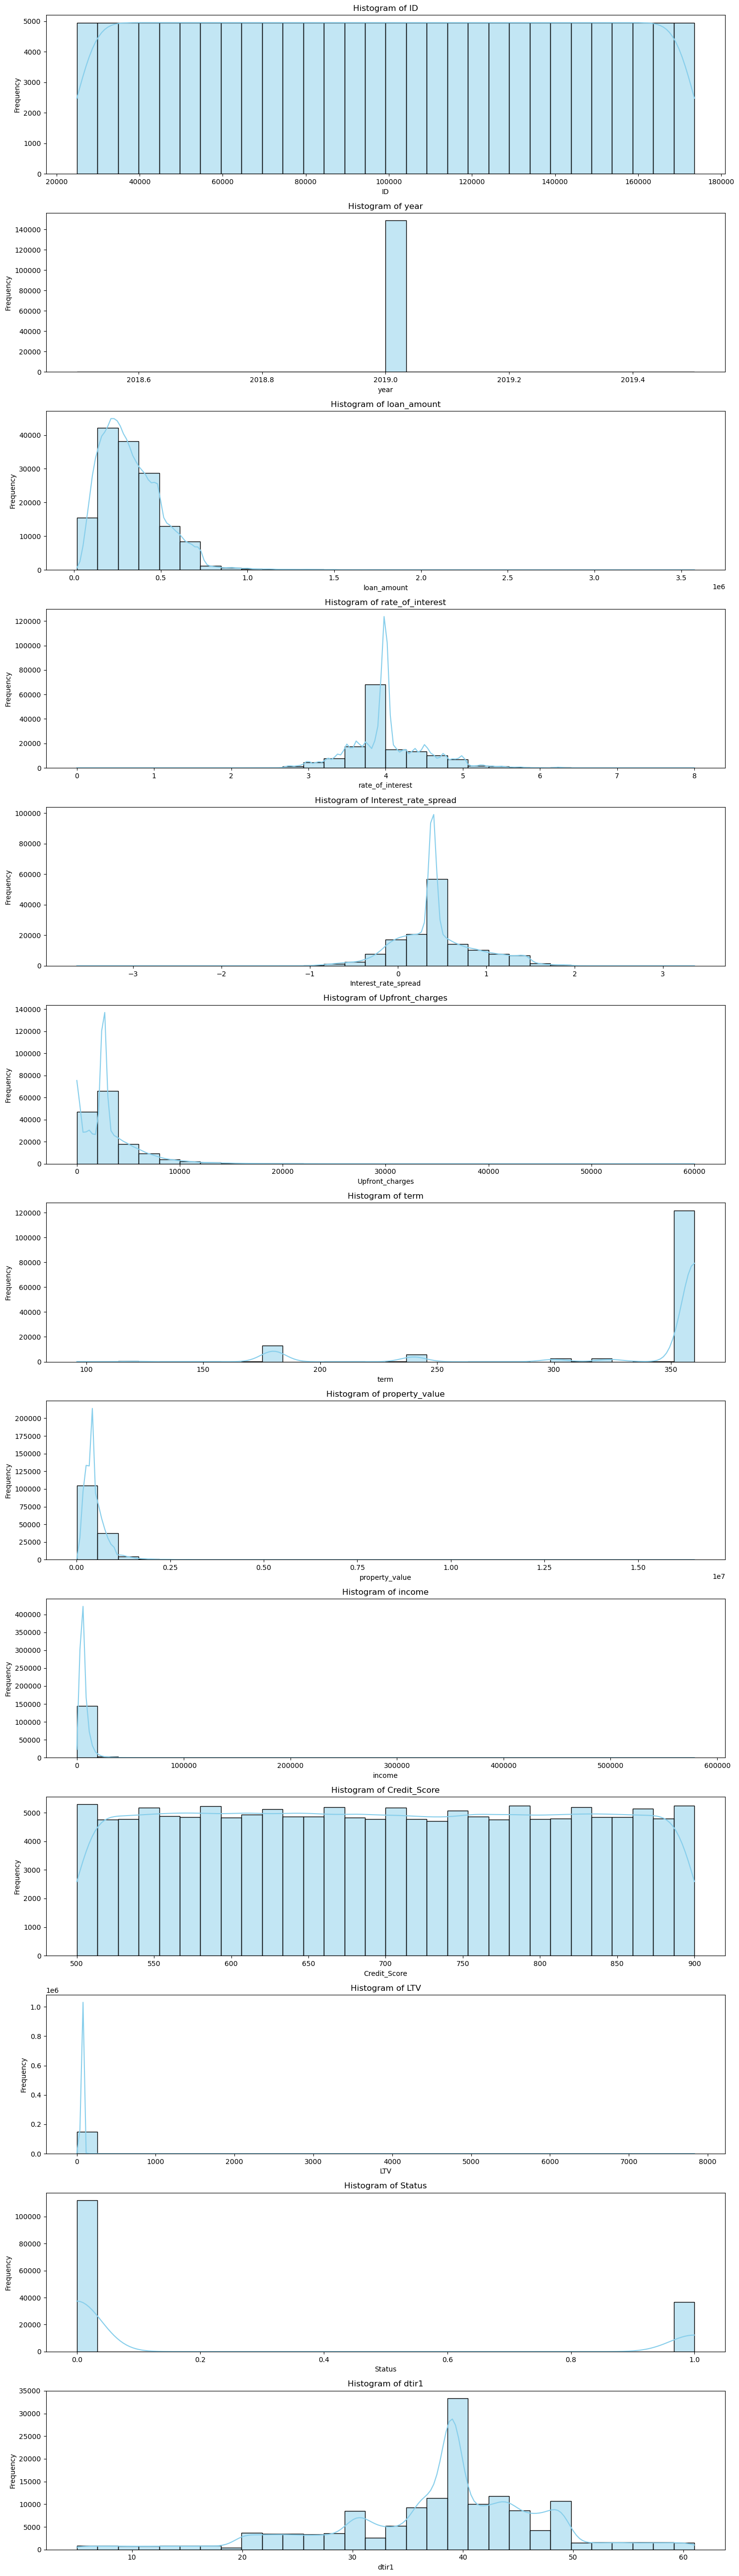

In [12]:
# Select numerical columns only
num_cols = data.select_dtypes(include=['number']).columns

# Set up the matplotlib figure
plt.figure(figsize=(15, 4 * len(num_cols)))

# Loop through numerical columns and plot histograms
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    sns.histplot(data[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show();


#### b) Categorical Univariante analyse

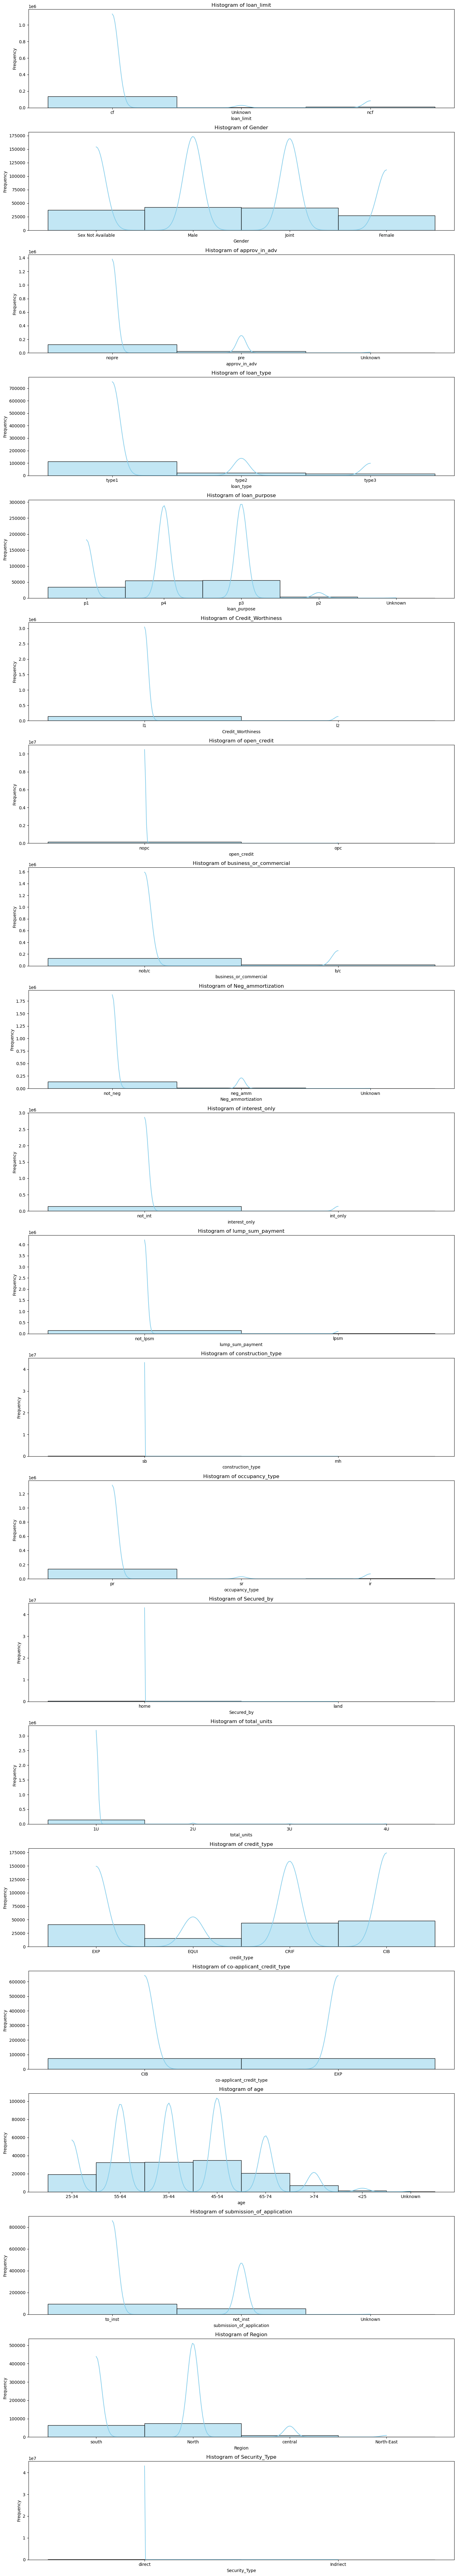

In [13]:
# Select Categorical columns only
categorical_cols = data.select_dtypes(include=['object']).columns

# Set up the matplotlib figure
plt.figure(figsize=(15, 4 * len(categorical_cols)))

# Loop through numerical columns and plot histograms
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 1, i)
    sns.histplot(data[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show();

In [14]:
data.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [15]:
data['Status'].value_counts
data['Status']

0         1
1         1
2         0
3         0
4         0
         ..
148665    0
148666    0
148667    0
148668    0
148669    0
Name: Status, Length: 148670, dtype: int64

In [16]:
status_summary = data['Status'].value_counts()
status_summary.columns = ['Status', 'count']

print(status_summary)


Status
0    112031
1     36639
Name: count, dtype: int64


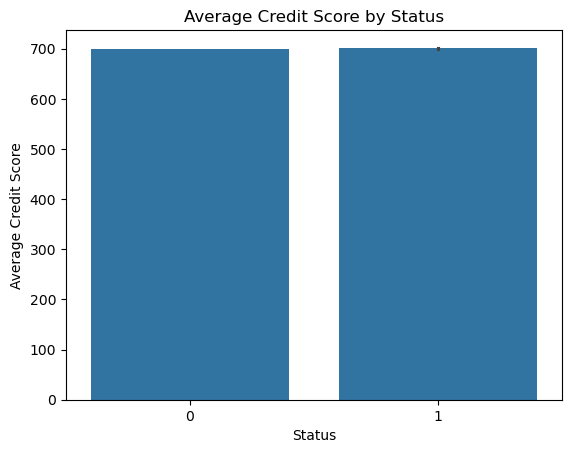

In [17]:
sns.barplot(
    data=data,
    x="Status",
    y="Credit_Score",
    estimator="mean"
)

plt.title("Average Credit Score by Status")
plt.xlabel("Status")
plt.ylabel("Average Credit Score")
plt.show()

In [18]:
clients_900 = data[data["Credit_Score"] == 900]


In [19]:
clients_900

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
144,25034,2019,cf,Joint,nopre,type1,p3,l1,nopc,nob/c,...,EQUI,900,EXP,45-54,not_inst,75.135870,south,direct,1,39.0
924,25814,2019,cf,Female,pre,type1,p4,l1,nopc,nob/c,...,CIB,900,CIB,65-74,to_inst,95.682731,North,direct,1,47.0
958,25848,2019,cf,Male,nopre,type2,p3,l1,nopc,b/c,...,EXP,900,CIB,45-54,to_inst,77.925532,North,direct,0,53.0
962,25852,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,EXP,900,CIB,65-74,to_inst,80.032468,south,direct,0,40.0
1945,26835,2019,cf,Joint,nopre,type1,p4,l1,nopc,nob/c,...,CIB,900,EXP,55-64,not_inst,67.518939,south,direct,0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147817,172707,2019,cf,Female,nopre,type2,p3,l1,nopc,b/c,...,CIB,900,CIB,35-44,to_inst,79.040404,south,direct,0,49.0
147981,172871,2019,cf,Joint,nopre,type1,p4,l1,nopc,nob/c,...,CIB,900,EXP,35-44,not_inst,87.119289,south,direct,0,44.0
148111,173001,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,EXP,900,EXP,55-64,to_inst,48.667377,south,direct,0,49.0
148201,173091,2019,cf,Female,nopre,type2,p3,l1,nopc,b/c,...,CRIF,900,CIB,65-74,not_inst,80.776515,south,direct,0,39.0


#### C) Data Correlatction

<Axes: >

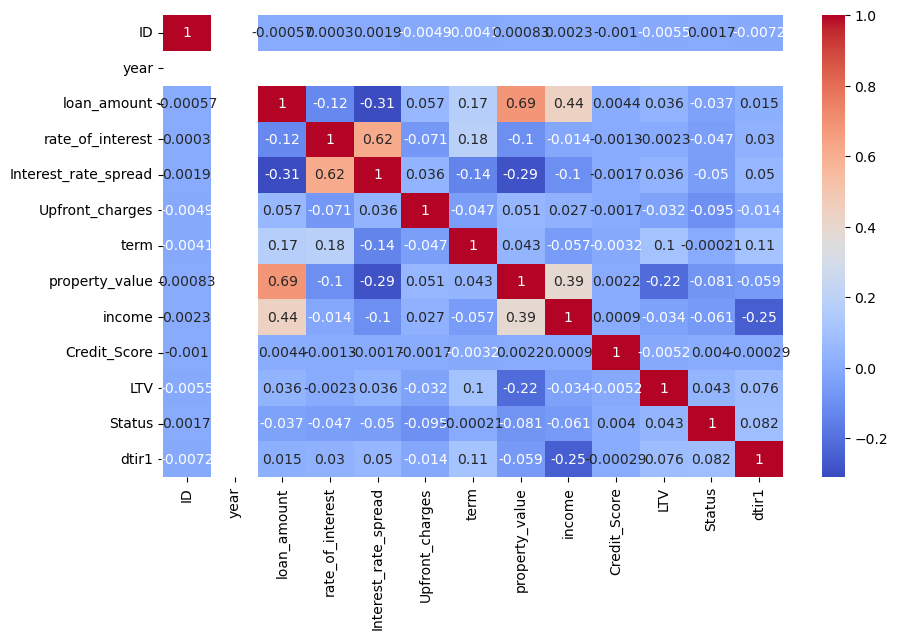

In [20]:
# Let Check the correlation
plt.figure(figsize=(10,6))
sns.heatmap(data.select_dtypes("number").corr(), annot=True, cmap="coolwarm")

### **Correlation Observation**


#### Observations from the Correlation Heatmap

#### 1. **Loan Amount Relationships**

* **Loan amount and property value** show a **strong positive correlation (~0.69)**
  Higher property values are associated with larger loan amounts.
* **Loan amount and income** have a **moderate positive correlation (~0.44)**
  Applicants with higher income tend to take larger loans.

---

#### 2. **Interest Rate Behavior**

* **Rate of interest and interest rate spread** have a **strong positive correlation (~0.62)**
   As interest rates increase, the interest rate spread also increases.
* **Interest rate and loan amount** show a **weak negative correlation (~ -0.12)**
   Larger loans tend to have slightly lower interest rates.

---

#### 3. **Income & Debt Indicators**

* **Income and DTIR (debt-to-income ratio)** show a **moderate negative correlation (~ -0.25)**
  Higher-income applicants generally have lower debt burden.
* **Income and property value** are **moderately positively correlated (~0.39)**
  Higher-income clients tend to own higher-value properties.

---

#### 4. **Credit Score Insights**

* **Credit score has very weak correlation with most variables**, including:

  * Loan amount
  * Income
  * LTV
  * Status
    This suggests credit score alone does not strongly linearly relate to approval or other numeric features in this dataset.

---

#### 5. **Loan-to-Value (LTV)**

* **LTV and property value** show a **negative correlation (~ -0.22)**
   Higher property values tend to reduce the loan-to-value ratio.
* **LTV and Status** have a **very weak positive correlation (~0.04)**
  LTV alone is not a strong linear predictor of loan approval.

---

#### 6. **Target Variable: Status**

* **Status has weak correlations with all numeric variables**

  * Credit Score (~0.00)
  * Income (~ -0.06)
  * DTIR (~0.08)
  * Loan Amount (~ -0.04)

This indicates that **loan approval is influenced by a combination of factors**, not a single numeric feature.

---

#### 7. **ID and Year**

* **ID and year show near-zero correlation with all variables**
   They do not contribute meaningful predictive information and can be dropped from modeling.

---

#### Summary Statement

> The correlation analysis shows that loan amount is strongly influenced by property value and income, while interest rate is closely related to interest rate spread. The target variable, Status, exhibits weak linear correlations with individual numerical features, suggesting that loan approval decisions depend on multiple interacting factors rather than a single variable.

### Drop Irrelevant Columns

In [21]:
irrelevant_cols = ["ID", "year"]

data = data.drop(columns=irrelevant_cols)

#### Outlier Identification

In [22]:
numerical_columns = data.select_dtypes("number")

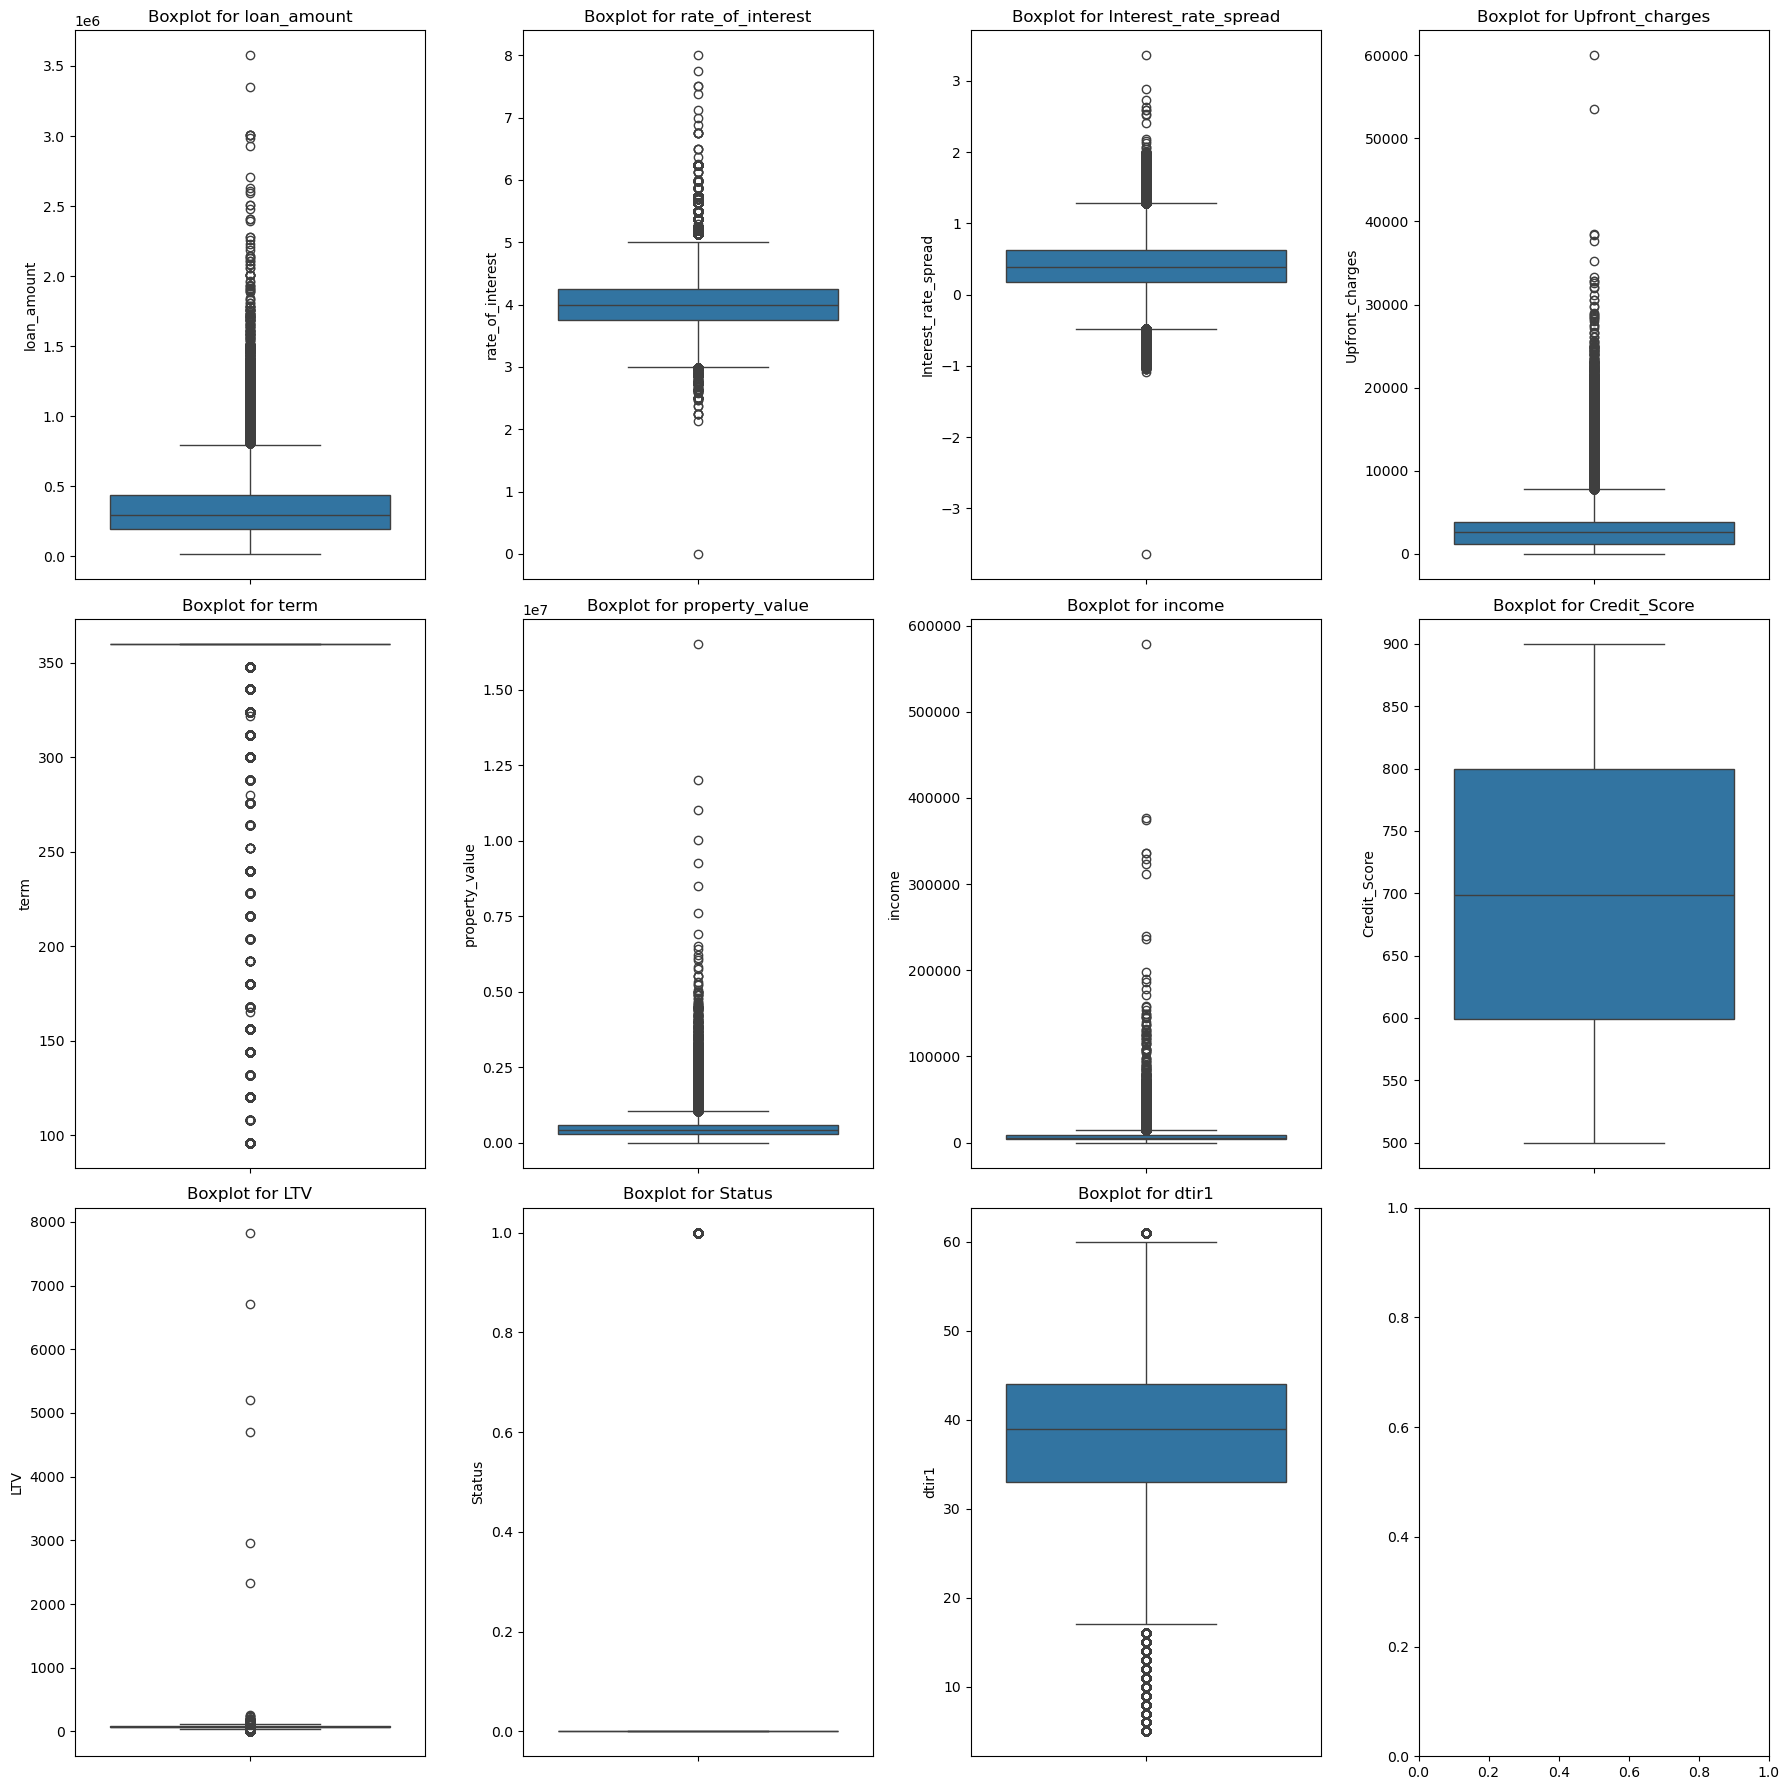

In [23]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(18, 18))
ax = ax.flatten()  

for idx, col in enumerate(numerical_columns):
    sns.boxplot(y=data[col], ax=ax[idx])
    ax[idx].set_title(f"Boxplot for {col}")

plt.tight_layout()
plt.show()

#### Outlier Observation

10 features present outlier: 

**loan_amount** Represent the high value of outlier

**rate_of_interest** Several both high and low outlier

**Interest_rate_spread** Outlier on both end

**Upfront_charges** Many extreme high outlier 

**term** Several High end outlier 

**property_value** Significat high outlier 

**income** Several High end outlier 

**Credit_Score** Very few or no extrem outlier 

**LTV** Several High end outlier 

**Status** No mainfull outlier 

**dtir1** Low and high outlier 

Let handling the outlier

In [24]:
data.columns

Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'Neg_ammortization', 'interest_only',
       'lump_sum_payment', 'property_value', 'construction_type',
       'occupancy_type', 'Secured_by', 'total_units', 'income', 'credit_type',
       'Credit_Score', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'LTV', 'Region', 'Security_Type', 'Status',
       'dtir1'],
      dtype='object')

In [25]:
# Columns where outliers were detected
iqr_cols = [
    "loan_amount",
    "rate_of_interest",
    "Interest_rate_spread",
    "Upfront_charges",
    "term",
    "property_value",
    "income",
    "Credit_Score",
    "LTV",
    "dtir1"
]

for col in iqr_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)

#### Let Confirm if the outlier as been removed

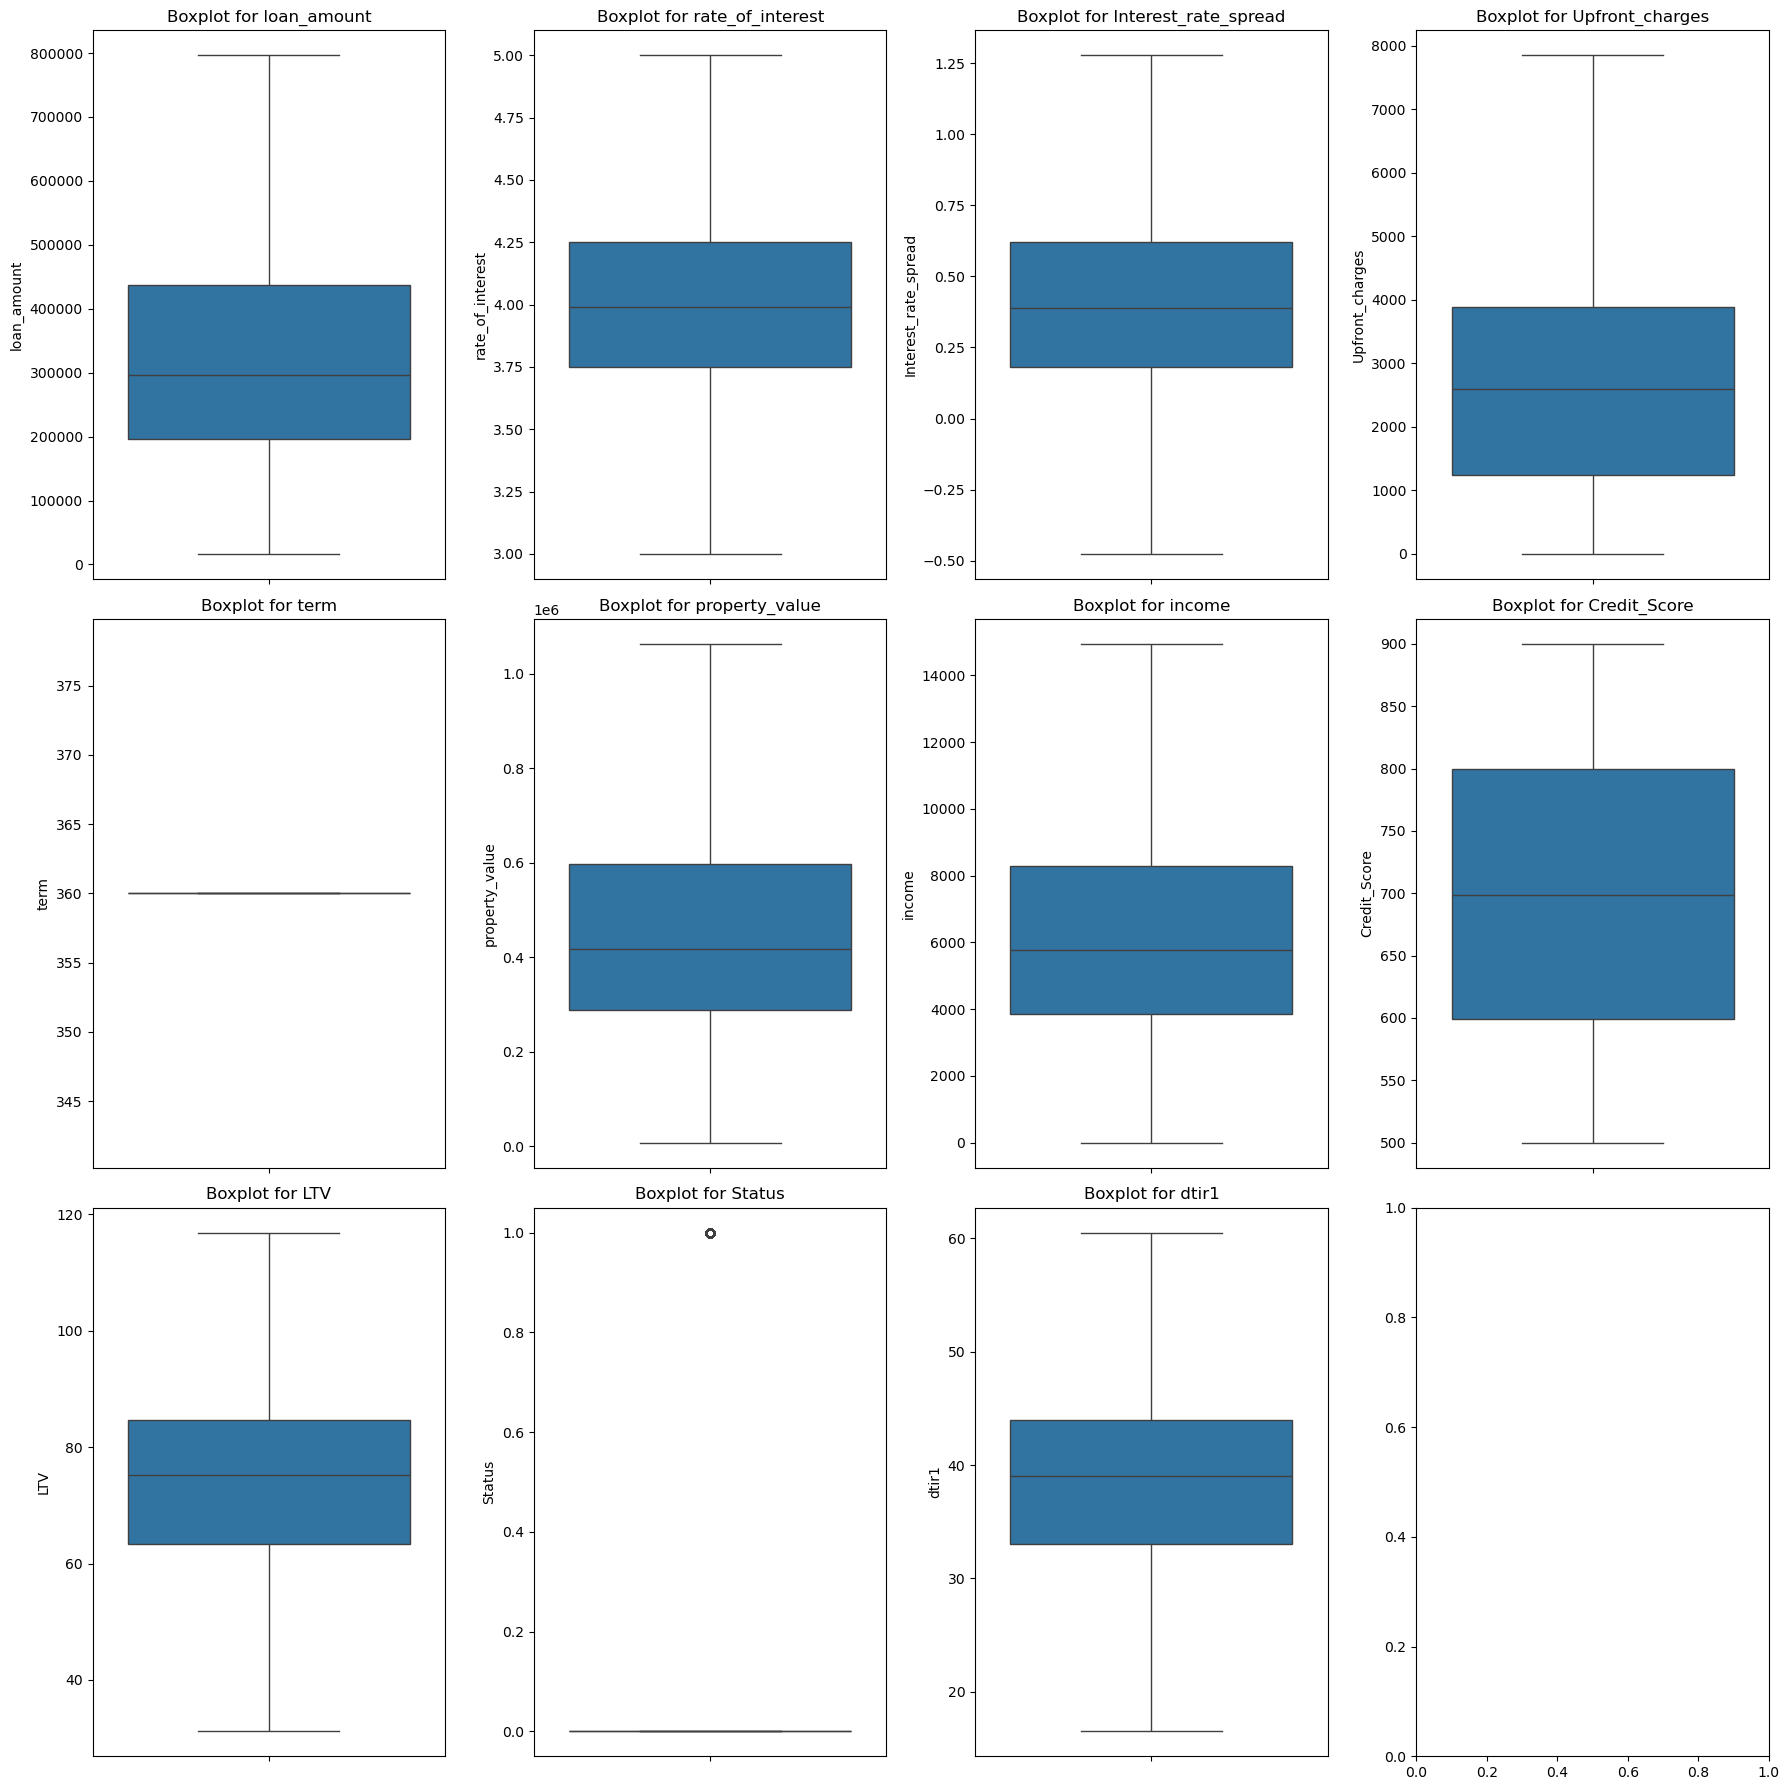

In [26]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(18, 18))
ax = ax.flatten()  

for idx, col in enumerate(numerical_columns):
    sns.boxplot(y=data[col], ax=ax[idx])
    ax[idx].set_title(f"Boxplot for {col}")

plt.tight_layout()
plt.show()

### 9 Feature Engineering

#### a) Encode categorical variables

In [27]:
# Import Librerie
from sklearn.preprocessing import LabelEncoder

In [28]:
# Iniciatization
le = LabelEncoder()
for col in data.select_dtypes(include="object"):
    data[col] = le.fit_transform(data[col])

In [29]:
len(num_cols)

13

#### b) Scale the Feature

In [30]:
# Let checkfirst the data distribution

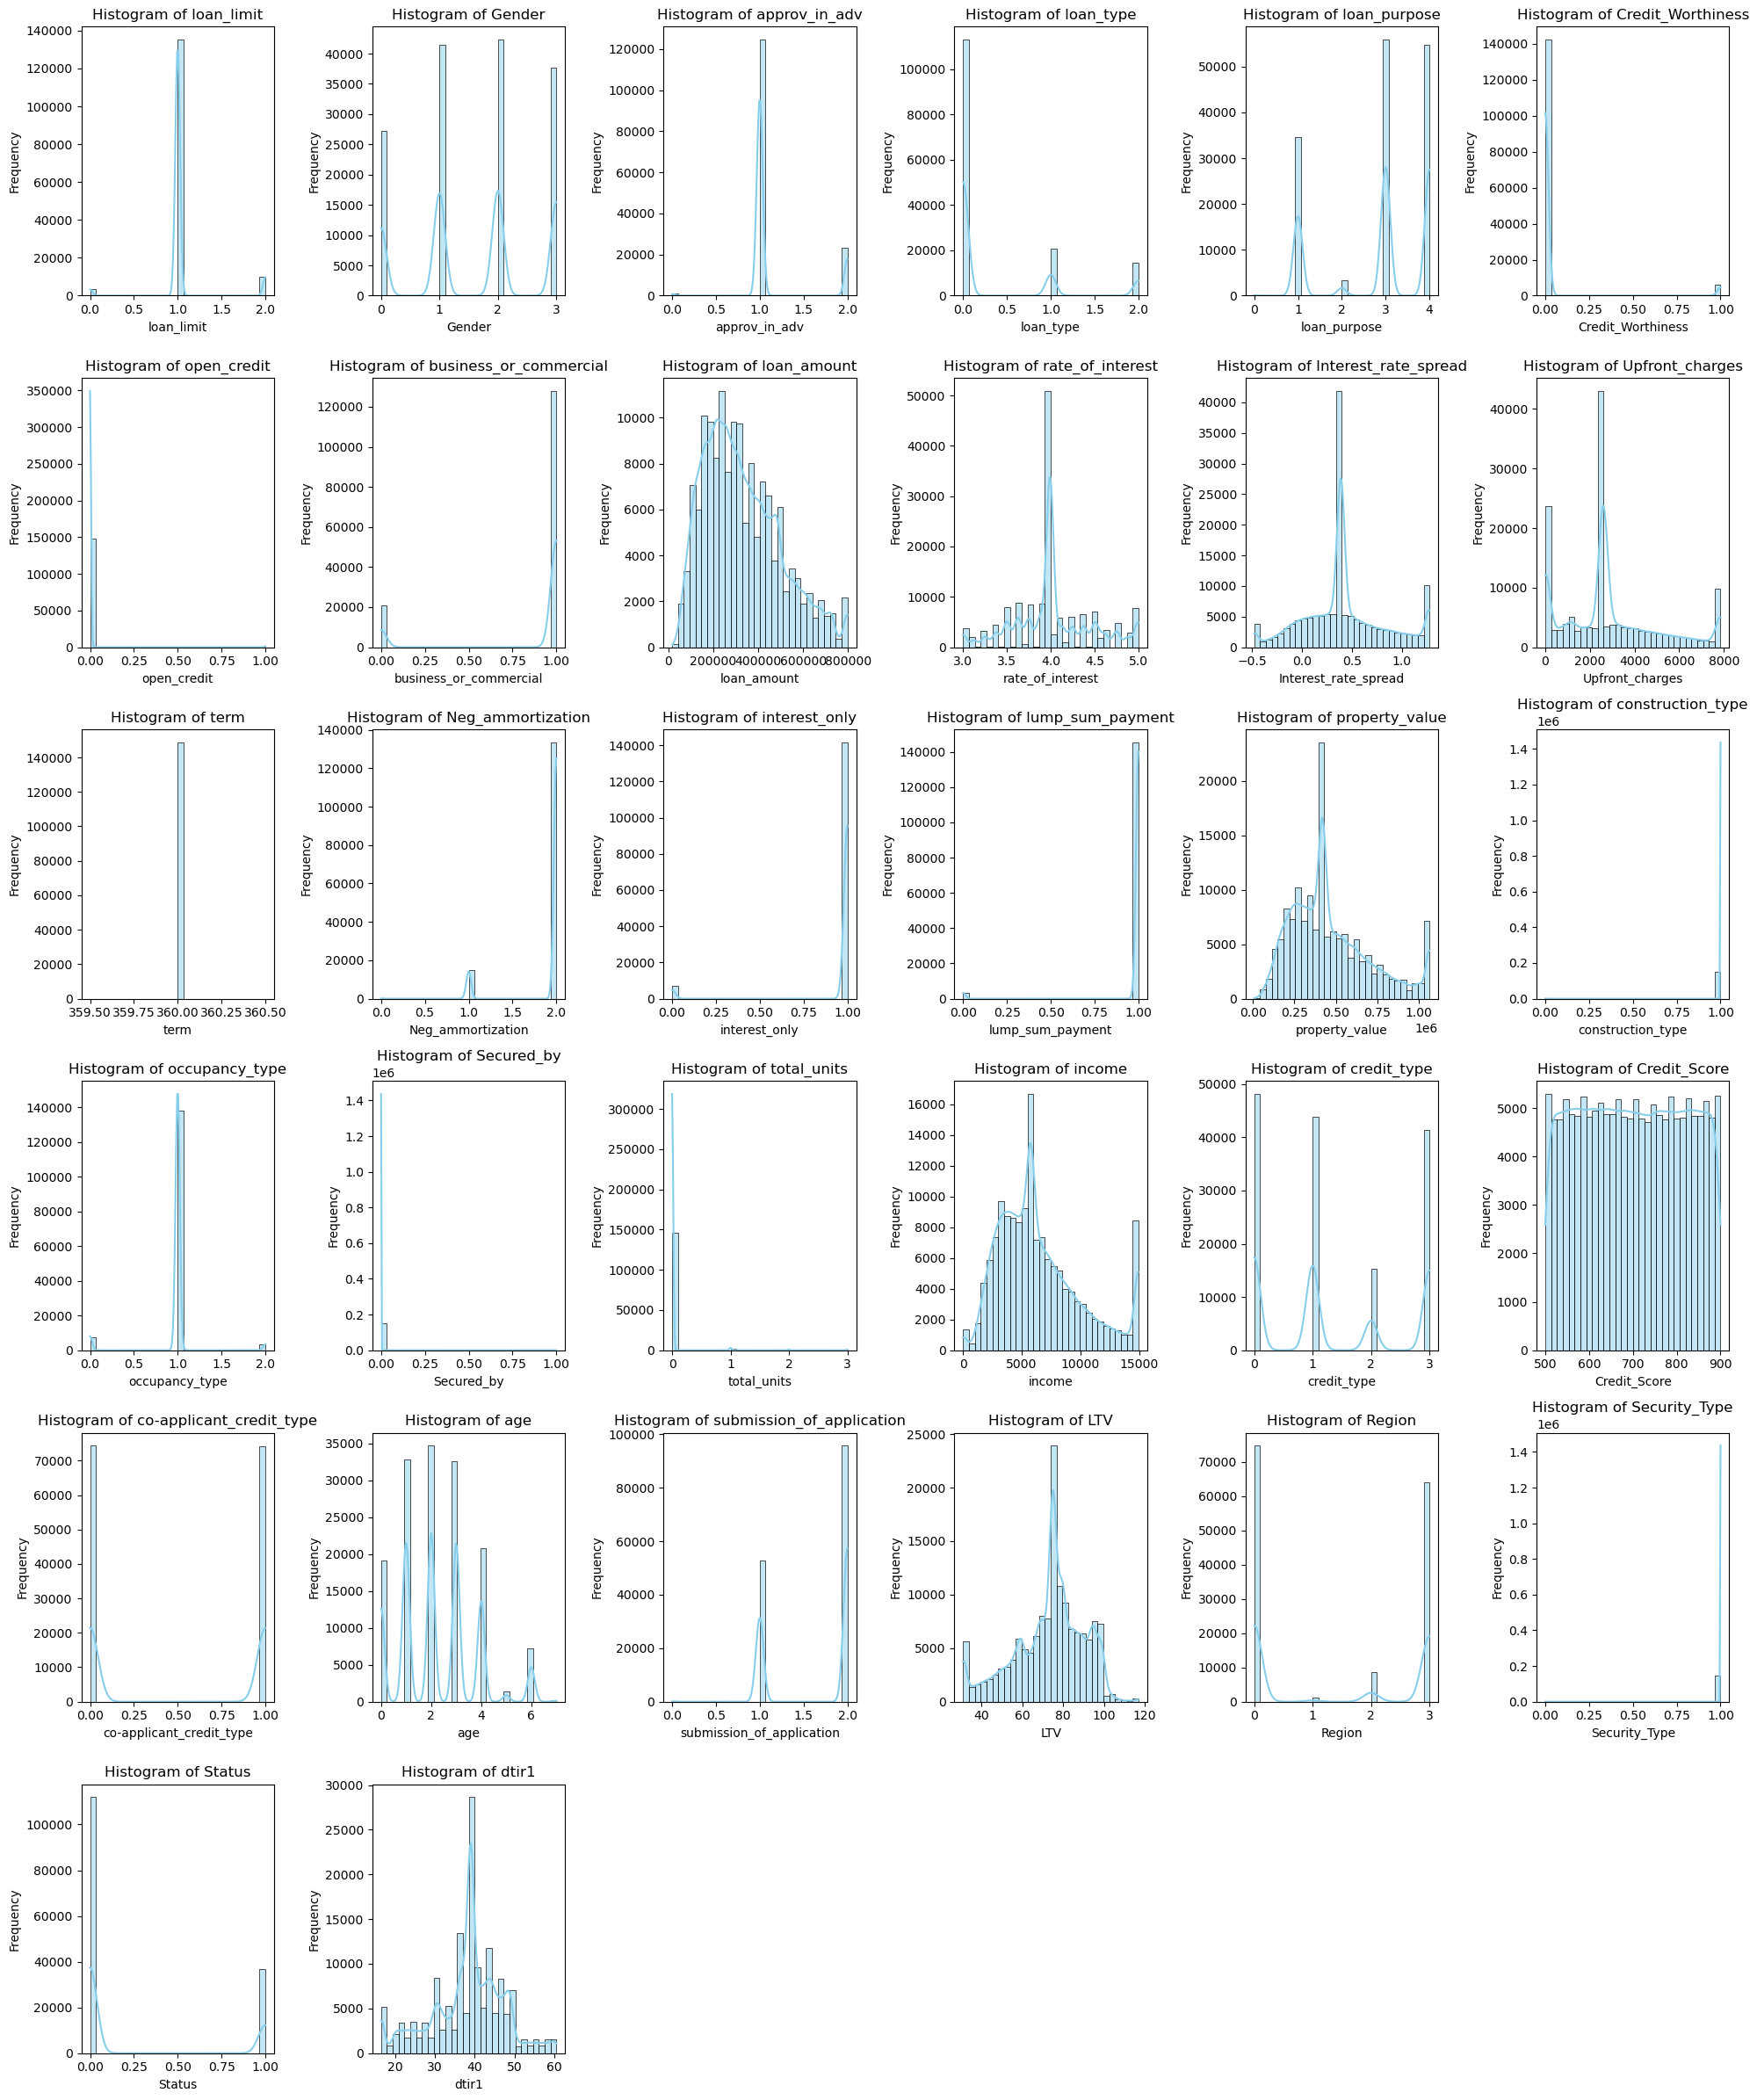

In [31]:
# Select numerical columns only
num_cols = data.select_dtypes(include='number').columns

# Create subplot grid
rows = 6
cols = 6

fig, axes = plt.subplots(rows, cols, figsize=(20, 4 * rows))
axes = axes.flatten()

# Plot histograms
for i, col in enumerate(num_cols):
    sns.histplot(data[col], kde=True, bins=30, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#### Distributiion Observation

     
**Uniform Distribution**
      
Loan

Approve in Advance

Loan Type

Credit Worthiness

Open Credit

Business or Commercial

Gender

Loan Purpose
    
**Strongly Skewe distribution**

Loan Amount

Interest Rate Spread

  
**Slightly Skewed Distribution**
  
Rate of Interest


In [32]:
data.columns

Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'Neg_ammortization', 'interest_only',
       'lump_sum_payment', 'property_value', 'construction_type',
       'occupancy_type', 'Secured_by', 'total_units', 'income', 'credit_type',
       'Credit_Score', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'LTV', 'Region', 'Security_Type', 'Status',
       'dtir1'],
      dtype='object')

### Let Encode the features based on distribution type

In [33]:
# Let Import the librerie
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, OneHotEncoder, RobustScaler

In [34]:
# StandardScler for Normal and Slightly Skewed Distribution
standard_scaler = StandardScaler()
data['rate_of_interest'] = standard_scaler.fit_transform(data[['rate_of_interest']])
data['Credit_Score'] = standard_scaler.fit_transform(data[['Credit_Score']])
data['LTV'] = standard_scaler.fit_transform(data[['LTV']])
data['dtir1'] = standard_scaler.fit_transform(data[['dtir1']])

In [35]:
# MiniMax for Uniform distribution
minimax_scaler = MinMaxScaler()
data['loan_limit'] = minimax_scaler.fit_transform(data[['loan_limit']])
data['approv_in_adv'] = minimax_scaler.fit_transform(data[['approv_in_adv']])
data['loan_type'] = minimax_scaler.fit_transform(data[['loan_type']])
data['Credit_Worthiness'] = minimax_scaler.fit_transform(data[['Credit_Worthiness']])
data['open_credit'] = minimax_scaler.fit_transform(data[['open_credit']])
data['business_or_commercial'] = minimax_scaler.fit_transform(data[['business_or_commercial']])
data['Gender'] = minimax_scaler.fit_transform(data[['Gender']])
data['loan_purpose'] = minimax_scaler.fit_transform(data[['loan_purpose']])

In [36]:
# Roubustiscaler for Strongly Skewed
robust_scaler = RobustScaler()
data['loan_amount'] = robust_scaler.fit_transform(data[['loan_amount']])
data['Interest_rate_spread'] = robust_scaler.fit_transform(data[['Interest_rate_spread']])

In [37]:
data.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,0.5,1.000000,0.5,0.0,0.25,0.0,0.0,1.0,-0.750000,-0.073337,...,3,0.502357,0,0,2,1.498275,3,1,1,0.752326
1,0.5,0.666667,0.5,0.5,0.25,0.0,0.0,0.0,-0.375000,-0.073337,...,2,-1.275413,1,3,2,0.122945,0,1,1,0.095300
2,0.5,0.666667,1.0,0.0,0.25,0.0,0.0,1.0,0.458333,1.183338,...,3,1.158234,0,1,2,0.407643,3,1,0,0.861831
3,0.5,0.666667,0.5,0.0,1.00,0.0,0.0,1.0,0.666667,0.499884,...,3,-0.973365,0,2,1,-0.212769,0,1,0,0.423813
4,0.5,0.333333,1.0,0.0,0.25,0.0,0.0,1.0,1.666667,-0.051290,...,1,-0.843916,1,0,1,1.099411,0,1,0,0.095300


#### C) Check Class Distributionm

In [38]:
data['Status'].value_counts()

Status
0    112031
1     36639
Name: count, dtype: int64

<Axes: xlabel='Status', ylabel='count'>

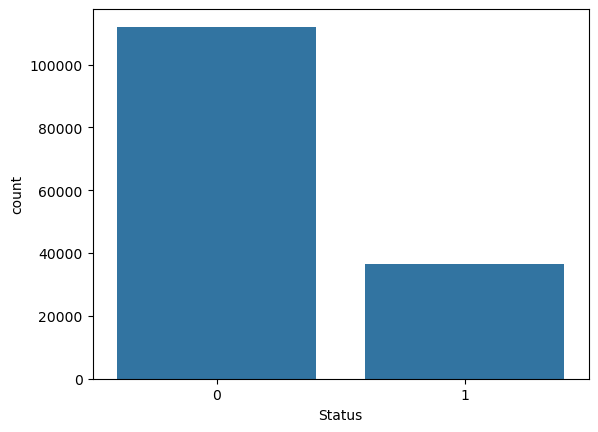

In [39]:
# Let visualize the target variable
sns.countplot(x=data["Status"])

In [40]:
#### d) Handling Imbalance using SMOTE

In [41]:
!pip install imbalanced-learn

In [42]:
# Import SMOTE Librerie
from imblearn.over_sampling import SMOTE

In [44]:
# Separet the feature and target
x= data.drop("Status", axis=1)
y= data["Status"]

In [45]:
# Initilization
smote= SMOTE(random_state=42)

In [46]:
X_resampled, y_resampled = smote.fit_resample(x,y)

In [47]:
y_resampled.value_counts()

Status
1    112031
0    112031
Name: count, dtype: int64

In [50]:
# Let Creat a resampled datset
resampled_data = pd.DataFrame(X_resampled, columns=x.columns)

In [51]:
# Let creat the Status columns
resampled_data["Status"] = y_resampled

In [52]:
resampled_data

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,dtir1,Status
0,0.500000,1.000000,0.500000,0.000000,0.250000,0.00000,0.0,1.000000,-0.750000,-0.073337,...,3,0.502357,0,0,2,1.498275,3,1,0.752326,1
1,0.500000,0.666667,0.500000,0.500000,0.250000,0.00000,0.0,0.000000,-0.375000,-0.073337,...,2,-1.275413,1,3,2,0.122945,0,1,0.095300,1
2,0.500000,0.666667,1.000000,0.000000,0.250000,0.00000,0.0,1.000000,0.458333,1.183338,...,3,1.158234,0,1,2,0.407643,3,1,0.861831,0
3,0.500000,0.666667,0.500000,0.000000,1.000000,0.00000,0.0,1.000000,0.666667,0.499884,...,3,-0.973365,0,2,1,-0.212769,0,1,0.423813,0
4,0.500000,0.333333,1.000000,0.000000,0.250000,0.00000,0.0,1.000000,1.666667,-0.051290,...,1,-0.843916,1,0,1,1.099411,0,1,0.095300,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224057,0.500000,0.153064,0.729597,0.500000,1.000000,0.00000,0.0,0.000000,1.004671,-0.073337,...,2,-1.567864,1,1,2,0.122945,3,1,0.095300,1
224058,0.500000,0.666667,0.500000,0.261068,0.619466,0.00000,0.0,1.000000,-0.403944,-0.073337,...,3,-1.025605,0,0,1,0.630692,0,1,0.975684,1
224059,0.801037,0.598618,0.500000,0.000000,1.000000,0.00000,0.0,1.000000,0.709197,-0.073337,...,3,0.507251,0,2,2,-1.685551,1,1,-0.952370,1
224060,0.500000,0.539263,0.808895,0.000000,0.441105,0.38221,0.0,1.000000,0.734075,-0.073337,...,2,0.176326,1,2,1,0.122945,0,1,0.095300,1


### Final dataset

In [53]:
resampled_data.to_csv("Loan_Approval_resampled.csv", index=False)

In [54]:
df = pd.read_csv("Loan_Approval_resampled.csv")

In [55]:
df["Status"]

0         1
1         1
2         0
3         0
4         0
         ..
224057    1
224058    1
224059    1
224060    1
224061    1
Name: Status, Length: 224062, dtype: int64

### Data Spliting

In [58]:
# Import Libreris
from sklearn.model_selection import train_test_split

# Splitting the dataset in 80% for train and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled,
    test_size=0.2,
    random_state=42
    )

In [60]:
# Let Print the size of my train and test data
print(f"Training data size {len(X_train)}")
print(f"Training data size {len(X_test)}")

Training data size 179249
Training data size 44813


In [61]:
# Let check it in percentage
y_train.value_counts(normalize=True)*100

Status
0    50.036541
1    49.963459
Name: proportion, dtype: float64

### 11 Multiple Classification models

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [63]:
!pip install xgboost

In [64]:
from xgboost import XGBClassifier

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


In [66]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'Ada Boost': AdaBoostClassifier(random_state=42),
    'KNeighbors Classifier': KNeighborsClassifier(),  # No random_state or class_weight
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'XGBoost': XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, random_state=42)
}

In [67]:
models.items()

dict_items([('Logistic Regression', LogisticRegression(class_weight='balanced', random_state=42)), ('Random Forest', RandomForestClassifier(class_weight='balanced', random_state=42)), ('Ada Boost', AdaBoostClassifier(random_state=42)), ('KNeighbors Classifier', KNeighborsClassifier()), ('Decision Tree', DecisionTreeClassifier(class_weight='balanced', random_state=42)), ('XGBoost', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_chil

In [68]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


Training Logistic Regression...


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.68      0.61      0.64     22341
           1       0.65      0.72      0.68     22472

    accuracy                           0.66     44813
   macro avg       0.67      0.66      0.66     44813
weighted avg       0.67      0.66      0.66     44813



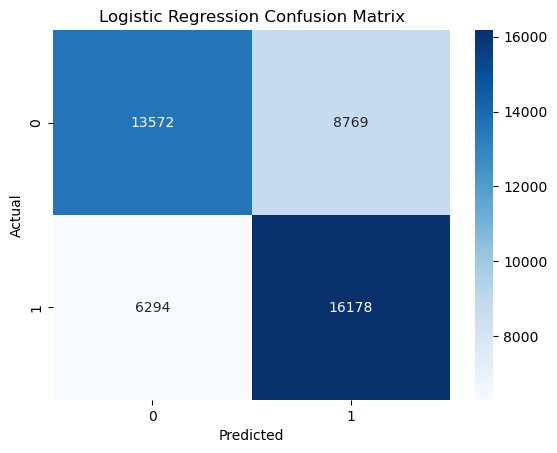

Training Random Forest...
Random Forest Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22341
           1       1.00      1.00      1.00     22472

    accuracy                           1.00     44813
   macro avg       1.00      1.00      1.00     44813
weighted avg       1.00      1.00      1.00     44813



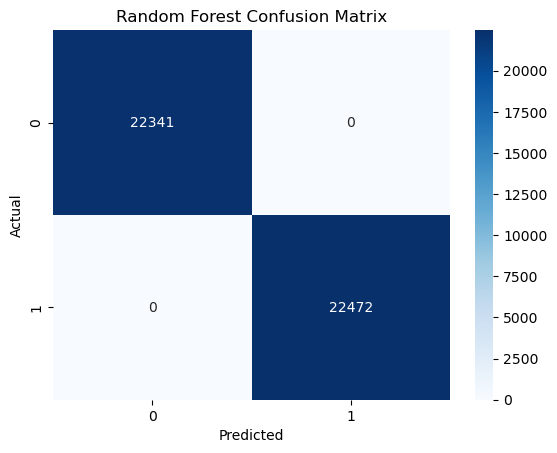

Training Ada Boost...
Ada Boost Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22341
           1       1.00      1.00      1.00     22472

    accuracy                           1.00     44813
   macro avg       1.00      1.00      1.00     44813
weighted avg       1.00      1.00      1.00     44813



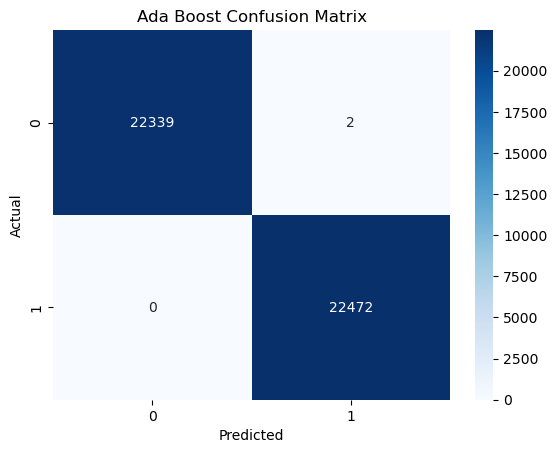

Training KNeighbors Classifier...
KNeighbors Classifier Classification Report
              precision    recall  f1-score   support

           0       0.99      0.92      0.96     22341
           1       0.93      0.99      0.96     22472

    accuracy                           0.96     44813
   macro avg       0.96      0.96      0.96     44813
weighted avg       0.96      0.96      0.96     44813



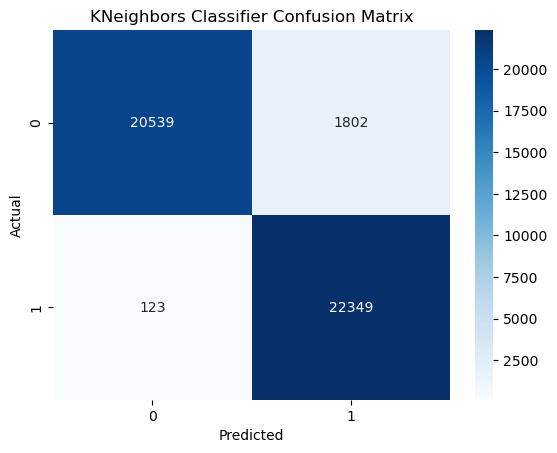

Training Decision Tree...
Decision Tree Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22341
           1       1.00      1.00      1.00     22472

    accuracy                           1.00     44813
   macro avg       1.00      1.00      1.00     44813
weighted avg       1.00      1.00      1.00     44813



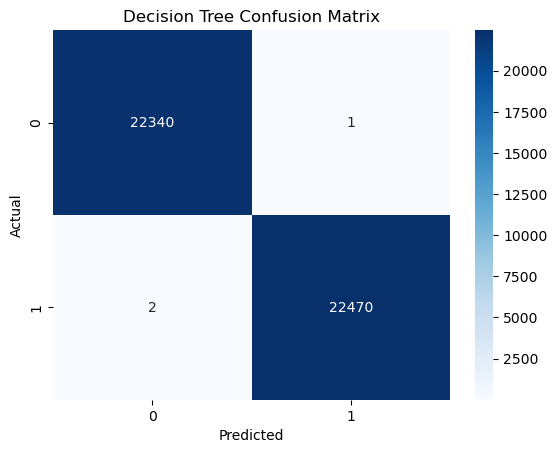

Training XGBoost...


C:\Users\HP\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [10:49:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22341
           1       1.00      1.00      1.00     22472

    accuracy                           1.00     44813
   macro avg       1.00      1.00      1.00     44813
weighted avg       1.00      1.00      1.00     44813



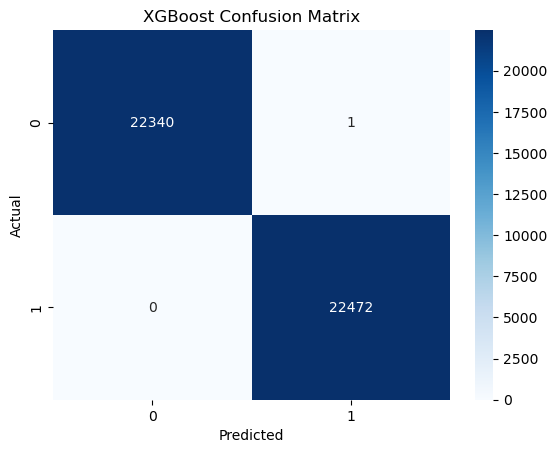

In [70]:
results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)

    # Store results
    results[model_name] = {
        'accuracy': accuracy,
        'classification_report': report,
        'confusion_matrix': matrix
    }

    # Print report
    print(f"{model_name} Classification Report")
    print(report)

    # Plot confusion matrix
    sns.heatmap(matrix, annot=True, fmt="g", cmap="Blues")
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


### 11 Hyperparameter turning

In [71]:
rmmodels = {
    "RandomForest": RandomForestClassifier(
        random_state=42,
        class_weight="balanced"
    )
}

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
# Define the parameter grid

parameter_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [74]:
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, class_weight="balanced"),
    param_grid=parameter_grid,
    scoring='f1',  
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='f1', verbose=1)

In [75]:
#best Parameter combination
print(f"Best {grid_search.best_params_}")

Best {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [76]:
# Train best parameter
best_rf = grid_search.best_estimator_

In [77]:
y_pred_best_rf = best_rf.predict(X_test)

In [78]:
print(f"Fine tuned random forest classifier")
repor = classification_report(y_test, y_pred_best_rf)
print(report)

Fine tuned random forest classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22341
           1       1.00      1.00      1.00     22472

    accuracy                           1.00     44813
   macro avg       1.00      1.00      1.00     44813
weighted avg       1.00      1.00      1.00     44813



### 12 Evaluation

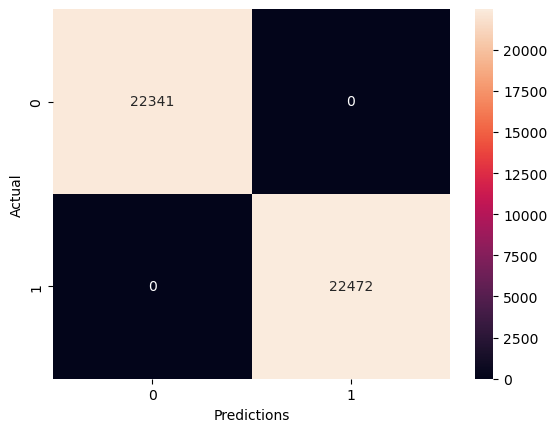

In [79]:
matrix = confusion_matrix(y_test, y_pred_best_rf)
sns.heatmap(matrix, annot=True, fmt="g")
plt.xlabel("Predictions")
plt.ylabel("Actual")
plt.show()

### 12 ROC Curve and AUC Score

In [80]:
from sklearn.metrics import roc_curve, roc_auc_score


In [82]:
# Compute the probabilities for ROC

In [83]:
y_probs = best_rf.predict_proba(X_test)[:,1]

In [84]:
# ROC Curve
fpr, tpr, threshold = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

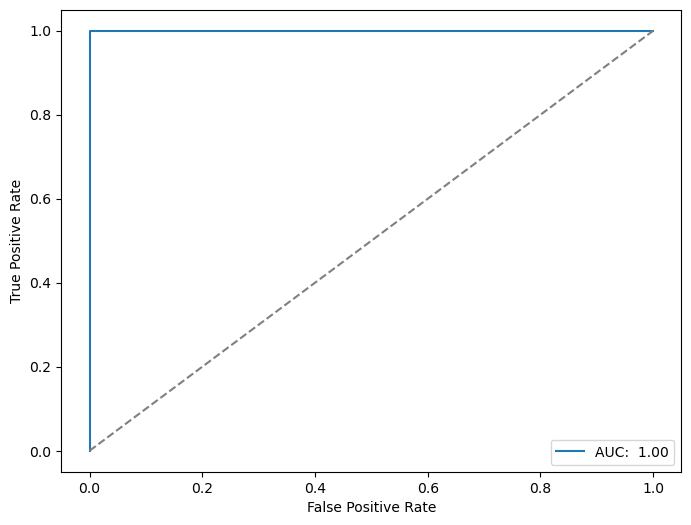

In [85]:
plt.figure(figsize=(8,6))

plt.plot(fpr, tpr, label=f"AUC: {auc_score: .2f}")
plt.plot([0,1], [0,1], linestyle="--" , color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

### 13 FEATURE IMPORTANCE

In [87]:
# Get feature importance
feature_importances = model.feature_importances_

# Create DataFrame
coefficients = pd.DataFrame({
    "Feature": x.columns,
    "Importance": feature_importances
})

# Sort by importance
coefficients_sorted = coefficients.sort_values(
    by="Importance",
    ascending=False
)

print(coefficients.head())


         Feature  Importance
0     loan_limit    0.001080
1         Gender    0.000121
2  approv_in_adv    0.000034
3      loan_type    0.000971
4   loan_purpose    0.000085


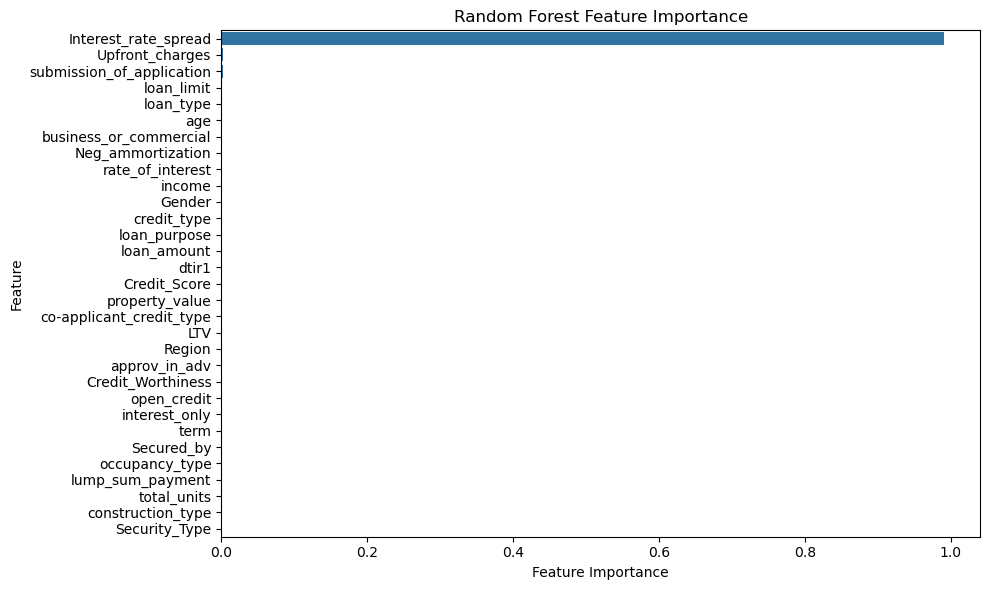

In [88]:
# Visualize the Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=coefficients_sorted)
plt.title('Random Forest Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [89]:
y_test.value_counts(normalize=True)

Status
1    0.501462
0    0.498538
Name: proportion, dtype: float64